In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 자음 기준 (중요성 있는 순서대로 나열)
# 1. 조음 위치, 유성음 여부
# 2. 조음 방법, 조음 강도

# Position (Bilabial) -0.5 --- 0.5 (Glottal)
conso_pos = { "Bilabial": -0.5, "Alveolar": -0.25, "Alveo-Palatal": 0, "Velar": 0.25, "Glottal": 0.5 }
# HowToPronunce (Plosive) 0.75 --- -0.25 (Lateral)
# 파열음(ㅂ, ㅍ, ㅃ, ㄷ, ㅌ, ㄸ, ㄱ, ㅋ, ㄲ), 마찰음(ㅅ, ㅆ, ㅎ), 파찰음(ㅈ, ㅊ, ㅉ), 비음(ㅁ, ㄴ, ㅇ), 유음(ㄹ)
conso_how = { "Plosive": 0.75, "Fricative": 0.25, "Affricate": 0.5, "Nasal": 0, "Lateral": -0.25 }
# Strength (Lenis) 0 --- 1 (Fortis)
conso_str = { "Lenis": 0, "Aspirated": 0.5, "Fortis": 1 }
# Voice or not (Yes) 0.5 --- -0.5 (No)
# 유성음인지 아닌지 구분
conso_voi = { "Yes": 0.5, "No": -0.5 }

consonants = pd.read_csv("csv/consonants.csv")
consonants["조음강도"] = consonants["조음강도"].replace("None", "Lenis") # None -> Lenis
print(consonants)

    IPA           조음위치       조음방법       조음강도 유성음여부
0     b       Bilabial    Plosive      Lenis   Yes
1    bʰ       Bilabial    Plosive  Aspirated   Yes
2    b*       Bilabial    Plosive     Fortis   Yes
3     p       Bilabial    Plosive      Lenis    No
4    pʰ       Bilabial    Plosive  Aspirated    No
5    p*       Bilabial    Plosive     Fortis    No
6     m       Bilabial      Nasal      Lenis   Yes
7     d       Alveolar    Plosive      Lenis   Yes
8    dʰ       Alveolar    Plosive  Aspirated   Yes
9    d*       Alveolar    Plosive     Fortis   Yes
10    t       Alveolar    Plosive      Lenis    No
11   tʰ       Alveolar    Plosive  Aspirated    No
12   t*       Alveolar    Plosive     Fortis    No
13    s       Alveolar  Fricative  Aspirated    No
14   s*       Alveolar  Fricative     Fortis    No
15    n       Alveolar      Nasal      Lenis    No
16    ɾ       Alveolar    Lateral      Lenis   Yes
17    l       Alveolar    Lateral      Lenis    No
18   dʑ  Alveo-Palatal  Affrica

In [19]:
# 입력된 문자열에서 자음 데이터만으로 조음 기관의 움직임 파악한다.

datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]
value_of_data = []

# datas 에서 각 문자열에 대한 조음위치와 조음방법과 조음강도에 대한 수치를 저장한다.
for data in datas:
    values = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(consonants["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                conso_pos_ = conso_pos[consonants.loc[consonants["IPA"] == ipa]["조음위치"].iloc[0]]
                conso_how_ = conso_how[consonants.loc[consonants["IPA"] == ipa]["조음방법"].iloc[0]]
                conso_str_ = conso_str[consonants.loc[consonants["IPA"] == ipa]["조음강도"].iloc[0]]
                conso_voi_ = conso_voi[consonants.loc[consonants["IPA"] == ipa]["유성음여부"].iloc[0]]
                value = [conso_pos_, conso_how_, conso_str_, conso_voi_]
                if len(values) == 0 or values[-1] != value:
                    values.append(value)
                idx += len(ipa)
        if skip == True:
            idx += 1
    value_of_data.append(values)
            
print(value_of_data)

[[[-0.25, 0, 0, -0.5], [0.25, 0, 0, 0.5], [-0.25, 0.25, 0.5, -0.5]], [[-0.25, 0, 0, -0.5], [-0.25, 0.75, 0, 0.5], [-0.5, 0, 0, 0.5], [-0.25, 0, 0, -0.5], [-0.25, 0.25, 0.5, -0.5]], [[-0.25, 0, 0, -0.5], [-0.5, 0, 0, 0.5], [-0.25, 0.25, 0.5, -0.5]], [[0.5, 0.25, 0.5, -0.5], [-0.25, 0, 0, -0.5], [0.25, 0, 0, 0.5], [0.25, 0.75, 0, -0.5], [-0.25, 0.25, 0.5, -0.5]], [[-0.5, 0, 0, 0.5], [0.25, 0, 0, 0.5], [-0.25, 0.75, 0, 0.5], [-0.5, 0, 0, 0.5], [0.25, 0, 0, 0.5], [-0.25, 0, 0, -0.5], [0, 0.5, 0, 0.5]]]


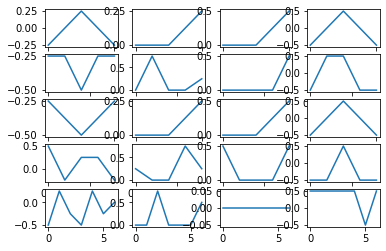

In [20]:
for idx, values in enumerate(value_of_data):
    conso_pos_list = [ value[0] for value in values ]
    conso_how_list = [ value[1] for value in values ]
    conso_str_list = [ value[2] for value in values ]
    conso_voi_list = [ value[3] for value in values ]
    
    # 조음위치
    plt.subplot(len(value_of_data), 4, idx*4 + 1)
    plt.plot(conso_pos_list)

    # 조음방법
    plt.subplot(len(value_of_data), 4, idx*4 + 2)
    plt.plot(conso_how_list)

    # 조음강도
    plt.subplot(len(value_of_data), 4, idx*4 + 3)
    plt.plot(conso_str_list)
    
    # 유성음여부
    plt.subplot(len(value_of_data), 4, idx*4 + 4)
    plt.plot(conso_voi_list)
    
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 모음 기준 (중요성 있는 순서대로 나열)
# 1. 입술 모양
# 2. 조음 좌우 위치, 조음 상하 위치

# shape (Unrounded) -0.5 --- 0.5 (Rounded)
vowel_shp = { "Unrounded": -0.5, "Rounded+Unrounded": -0.17, "Unrounded+Rounded": 0.17, "Rounded": 0.5 }
# width position (Front) -0.5 --- 0.5 (Back)
vowel_wps = { "Front": -0.5, "Back+Front": -0.17, "Front+Back": 0.17, "Back": 0.5 }
# height position (Low) -0.5 --- 0.5 (High)
vowel_hps = { "Low": -0.5, "Mid+Low": -0.3, "High+Low": -0.1, "Mid": 0, "High+Mid": 0.2, "High": 0.5 }

vowels = pd.read_csv("csv/vowels.csv")
print(vowels)

   IPA    조음상하위치      조음좌우위치               입술모양
0    i      High       Front          Unrounded
1    ɯ      High        Back          Unrounded
2    u      High        Back            Rounded
3    ɛ       Mid       Front          Unrounded
4    ʌ       Mid        Back          Unrounded
5    o       Mid        Back            Rounded
6    ɑ       Low        Back          Unrounded
7    a       Low        Back          Unrounded
8   ju      High  Front+Back            Rounded
9   jʌ  High+Mid  Front+Back          Unrounded
10  jo  High+Mid  Front+Back            Rounded
11  jɛ  High+Mid  Front+Back          Unrounded
12  ja  High+Low  Front+Back          Unrounded
13  wi      High  Back+Front  Rounded+Unrounded
14  wʌ  High+Mid        Back  Rounded+Unrounded
15  wɛ  High+Mid  Back+Front  Rounded+Unrounded
16  wa   Mid+Low        Back  Rounded+Unrounded
17  ɰi      High  Back+Front  Unrounded+Rounded


In [22]:
# 입력된 문자열에서 자음 데이터만으로 조음 기관의 움직임 파악한다.

datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]
value_of_data = []

# datas 에서 각 문자열에 대한 입술 모양, 조음 좌우 위치, 조음 상하 위치에 대한 수치를 저장한다.
for data in datas:
    values = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(vowels["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                vowel_shp_ = vowel_shp[vowels.loc[vowels["IPA"] == ipa]["입술모양"].iloc[0]]
                vowel_wps_ = vowel_wps[vowels.loc[vowels["IPA"] == ipa]["조음좌우위치"].iloc[0]]
                vowel_hps_ = vowel_hps[vowels.loc[vowels["IPA"] == ipa]["조음상하위치"].iloc[0]]
                value = [vowel_shp_, vowel_wps_, vowel_hps_]
                if len(values) == 0 or values[-1] != value:
                    values.append(value)
                idx += len(ipa)
        if skip == True:
            idx += 1
    value_of_data.append(values)
            
print(value_of_data)

[[[-0.5, 0.5, -0.5], [-0.5, 0.17, 0.2], [-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]], [[-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [-0.5, 0.5, 0], [-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]], [[-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]], [[-0.5, 0.5, -0.5], [-0.5, 0.17, 0.2], [-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]], [[-0.5, 0.17, 0.2], [-0.17, 0.5, -0.3], [-0.5, -0.5, 0.5], [-0.5, 0.17, 0.2], [-0.5, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.5, 0]]]


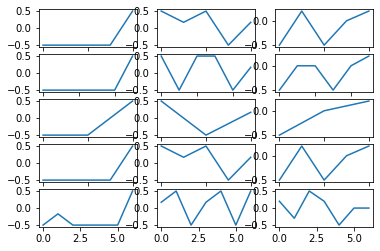

In [23]:
for idx, values in enumerate(value_of_data):
    vowel_shp_list = [ value[0] for value in values ]
    vowel_wps_list = [ value[1] for value in values ]
    vowel_hps_list = [ value[2] for value in values ]

    # 입술 모양
    plt.subplot(len(value_of_data), 3, idx*3 + 1)
    plt.plot(vowel_shp_list)

    # 조음 좌우 위치
    plt.subplot(len(value_of_data), 3, idx*3 + 2)
    plt.plot(vowel_wps_list)

    # 조음 상하 위치
    plt.subplot(len(value_of_data), 3, idx*3 + 3)
    plt.plot(vowel_hps_list)

plt.show()

In [24]:
# 여기까지 자음, 모음에 대한 독립적인 분석이었고, 아래부터는 자음+모음이 합쳐진 상태에서 분석 진행하는 것임.

In [25]:
datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]

# data 에서 각 IPA 문자에 대응되는 수치를 저장한다.
def mapping_ipa_with_value(data):
    values = []
    types = []
    origs = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(consonants["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                conso_pos_ = conso_pos[consonants.loc[consonants["IPA"] == ipa]["조음위치"].iloc[0]]
                conso_how_ = conso_how[consonants.loc[consonants["IPA"] == ipa]["조음방법"].iloc[0]]
                conso_str_ = conso_str[consonants.loc[consonants["IPA"] == ipa]["조음강도"].iloc[0]]
                conso_voi_ = conso_voi[consonants.loc[consonants["IPA"] == ipa]["유성음여부"].iloc[0]]
                value = [conso_pos_, conso_how_, conso_str_, conso_voi_]
                if len(values) == 0 or values[-1] != value:
                    values.append(value)
                    if ipa == "ŋ": # 받침이 있는 경우, 'C' 가 아닌 'c' 로 등록하여 이후 처리에 반영한다.
                        types.append("c") # Consonants (받침)
                    else:
                        types.append("C") # Consonants
                    
                    origs.append(ipa)
                idx += len(ipa)
        for ipa in list(vowels["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                vowel_shp_ = vowel_shp[vowels.loc[vowels["IPA"] == ipa]["입술모양"].iloc[0]]
                vowel_wps_ = vowel_wps[vowels.loc[vowels["IPA"] == ipa]["조음좌우위치"].iloc[0]]
                vowel_hps_ = vowel_hps[vowels.loc[vowels["IPA"] == ipa]["조음상하위치"].iloc[0]]
                value = [vowel_shp_, vowel_wps_, vowel_hps_]
                if len(values) == 0 or values[-1] != value:
                    values.append(value)
                    types.append("V") # Vowels
                    origs.append(ipa)
                idx += len(ipa)
        if skip == True:
            idx += 1
    return values, types, origs
    
# datas 에서 각 IPA 문자에 대응되는 수치를 저장한다.
for data in datas:
    values, types, origs = mapping_ipa_with_value(data)
    print(values, types, origs)

[[-0.5, 0.5, -0.5], [-0.25, 0, 0, -0.5], [-0.5, 0.17, 0.2], [0.25, 0, 0, 0.5], [-0.5, 0.5, -0.5], [-0.25, 0.25, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]] ['V', 'C', 'V', 'c', 'V', 'C', 'V', 'V'] ['ɑ', 'n', 'jʌ', 'ŋ', 'ɑ', 's', 'ɛ', 'jo']
[[-0.5, 0.5, -0.5], [-0.25, 0, 0, -0.5], [-0.25, 0.75, 0, 0.5], [-0.5, -0.5, 0], [-0.5, 0.5, 0], [-0.5, 0, 0, 0.5], [-0.5, 0.5, -0.5], [-0.25, 0, 0, -0.5], [-0.25, 0.25, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]] ['V', 'C', 'C', 'V', 'V', 'C', 'V', 'C', 'C', 'V', 'V'] ['ɑ', 'n', 'd', 'ɛ', 'ʌ', 'm', 'ɑ', 'n', 's', 'ɛ', 'jo']
[[-0.5, 0.5, -0.5], [-0.25, 0, 0, -0.5], [-0.5, 0, 0, 0.5], [-0.5, 0.5, -0.5], [-0.25, 0.25, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]] ['V', 'C', 'C', 'V', 'C', 'V', 'V'] ['ɑ', 'n', 'm', 'a', 's', 'ɛ', 'jo']
[[0.5, 0.25, 0.5, -0.5], [-0.5, 0.5, -0.5], [-0.25, 0, 0, -0.5], [-0.5, 0.17, 0.2], [0.25, 0, 0, 0.5], [0.25, 0.75, 0, -0.5], [-0.5, 0.5, -0.5], [-0.25, 0.25, 0.5, -0.5], [-0.5, -0.5, 0], [0.5, 0.17, 0.2]] ['C', 'V

In [26]:
def split_types(types):
    result = []
    
    while len(types) > 0:
        if types.startswith("CVCC"):
            result.append(types[:3])
            types = types[3:]
        elif types.startswith("CVCV"):
            result.append(types[:2])
            types = types[2:]
        elif types.startswith("CVV"):
            result.append(types[:2])
            types = types[2:]
        elif types.startswith("VCC"):
            result.append(types[:2])
            types = types[2:]
        elif types.startswith("VCV"):
            result.append(types[:1])
            types = types[1:]
        elif types.startswith("CVc"):
            result.append(types[:3])
            types = types[3:]
        elif types.startswith("Vc"):
            result.append(types[:2])
            types = types[2:]
        elif types.startswith("VV"):
            result.append(types[:1])
            types = types[1:]
        else:
            result.append(types[:])
            types = ""
    
    return result
        
print("CVCCV", split_types("CVCCV"))
print("CVCV", split_types("CVCV"))
print("CVcV", split_types("CVcV"))
print("CVCC", split_types("CVCC"))
print("VCCVC", split_types("VCCVC"))
print("CVCCV", split_types("CVCCV"))
print("CVcCV", split_types("CVcCV"))
print("VCCVCVV", split_types("VCCVCVV"))
print("VCVCVCVV", split_types("VCVCVCVV"))
print("VCVcVCVV", split_types("VCVcVCVV"))
print("VCCVCVVC", split_types("VCCVCVVC"))
print("CVCCVVVC", split_types("CVCCVVVC"))
print("CVcCVVVC", split_types("CVcCVVVC"))
print("CVcVCVCVcVCCVV", split_types("CVcVCVCVcVCCVV"))

CVCCV ['CVC', 'CV']
CVCV ['CV', 'CV']
CVcV ['CVc', 'V']
CVCC ['CVC', 'C']
VCCVC ['VC', 'CVC']
CVCCV ['CVC', 'CV']
CVcCV ['CVc', 'CV']
VCCVCVV ['VC', 'CV', 'CV', 'V']
VCVCVCVV ['V', 'CV', 'CV', 'CV', 'V']
VCVcVCVV ['V', 'CVc', 'V', 'CV', 'V']
VCCVCVVC ['VC', 'CV', 'CV', 'VC']
CVCCVVVC ['CVC', 'CV', 'V', 'VC']
CVcCVVVC ['CVc', 'CV', 'V', 'VC']
CVcVCVCVcVCCVV ['CVc', 'V', 'CV', 'CVc', 'VC', 'CV', 'V']


In [119]:
# C+V 단위 Vectorization 진행
def vectorize_ipa(values, types, origs):
    vector_values = []
    vector_types = []
    vector_origs = []
    prev_type = None
    
    # C+V 단위 Vectorization
    types_after = split_types(''.join(types))
    
    idx = 0
    for types_ in types_after:
        vector_value = []
        vector_orig = []
        
        if types_ == "CVC" or types_ == "CVc":
            vector_value += values[idx]
            vector_value += values[idx+1]
            vector_value += values[idx+2]
            vector_orig.append(origs[idx])
            vector_orig.append(origs[idx+1])
            vector_orig.append(origs[idx+2])
        elif types_ == "CV":
            vector_value += values[idx]
            vector_value += values[idx+1]
            vector_value += [0, 0, 0, 0]
            vector_orig.append(origs[idx])
            vector_orig.append(origs[idx+1])
        elif types_ == "VC" or types_ == "Vc":
            vector_value += [0, 0, 0, 0]
            vector_value += values[idx]
            vector_value += values[idx+1]
            vector_orig.append(origs[idx])
            vector_orig.append(origs[idx+1])
        elif types_ == "V":
            vector_value += [0, 0, 0, 0]
            vector_value += values[idx]
            vector_value += [0, 0, 0, 0]
            vector_orig.append(origs[idx])
        elif types_ == "C":
            vector_value += values[idx]
            vector_value += [0, 0, 0]
            vector_value += [0, 0, 0, 0]
            vector_orig.append(origs[idx])
        else:
            print(types_)
            raise Exception("types_ 에 대하여 예기치 못한 입력값이 들어왔습니다.")
        
        vector_type = types_
        vector_values.append(vector_value)
        vector_types.append(vector_type)
        vector_origs.append(vector_orig)
        idx += len(types_)
            
    # 1차원 값으로 집어넣고, 이후 distance 값 구한 뒤에 similarity 구하면 된다.
            
    return vector_values, vector_types, vector_origs


for data in datas:
    values, types, origs = mapping_ipa_with_value(data)
    vector_values, vector_types, vector_origs = vectorize_ipa(values, types, origs)
    print(vector_values, vector_types, vector_origs)

[[0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0, 0, -0.5, -0.5, 0.17, 0.2, 0.25, 0, 0, 0.5], [0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0.25, 0.5, -0.5, -0.5, -0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.5, 0.17, 0.2, 0, 0, 0, 0]] ['V', 'CVc', 'V', 'CV', 'V'] [['ɑ'], ['n', 'jʌ', 'ŋ'], ['ɑ'], ['s', 'ɛ'], ['jo']]
[[0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0, 0, -0.5, -0.5, 0.17, 0.2, 0.25, 0, 0, 0.5], [0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0.25, 0.5, -0.5, -0.5, -0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.5, 0.17, 0.2, 0, 0, 0, 0], [0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0, 0, -0.5, -0.5, 0.17, 0.2, 0, 0, 0, 0], [0, 0, 0, 0, -0.5, 0.5, -0.5, 0.25, 0, 0, 0.5], [0, 0, 0, 0, -0.5, 0.5, -0.5, 0, 0, 0, 0], [-0.25, 0.25, 0.5, -0.5, -0.5, -0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.5, 0.17, 0.2, 0, 0, 0, 0], [0, 0, 0, 0, -0.5, 0.5, -0.5, -0.25, 0, 0, -0.5], [-0.25, 0.75, 0, 0.5, -0.5, -0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0, -0.5, 0.5, 0, 0, 0, 0, 0], [-0.5, 0, 0, 0.5, -0.5, 0

In [123]:
# 두 value 사이에서의 score 를 구하는 함수 (1차원) (default)
def get_score_1d(values_ans, values_usr):
    assert isinstance(values_ans, list), "1차원 리스트에 대한 입력값만 지원합니다"
    assert not isinstance(values_ans[0], list), "1차원 리스트에 대한 입력값만 지원합니다"
    assert isinstance(values_usr, list), "1차원 리스트에 대한 입력값만 지원합니다"
    assert not isinstance(values_usr[0], list), "1차원 리스트에 대한 입력값만 지원합니다"
    
    # value_1 과 value_2 의 원소 배열 크기가 다른 경우, max distance (=1) 반환함.
    if len(values_ans) != len(values_usr):
        return 0 # min score 반환
    
    sum_score = 0
    cnt_score = 0
    
    for idx in range(len(values_ans)):
        distance = abs(values_usr[idx] - values_ans[idx])
        sum_score += (1 - distance) ** 2 # 거듭제곱 형식으로 정답보다 멀수록 점수를 더 차감하는 방식
        cnt_score += 1
    
    return (sum_score / cnt_score) ** 2 # 거듭제곱 형식으로 정답보다 멀수록 점수를 더 차감하는 방식

print(get_score_1d([0, 1, 1, 0, 1], [1, 0, 0, 1, 0]))
print(get_score_1d([0, 1, 1, 1], [1, 0, 1, 1]))
print(get_score_1d([0, 0.5, 0.25, 0.5], [0, 0, 0, 1]))

print("----------") # outputs are real distance values belows

import numpy as np

# values_1 과 values_2 에 대한 서로 대응하는 distance 를 계산한다.
# types_1 : answer, types_2 : user_input
def get_scores(values_ans, types_ans, values_usr, types_usr):
    scores = np.zeros((len(types_ans), len(types_usr)), dtype=float)
    
    for i in range(len(types_ans)):
        for j in range(len(types_usr)):
            scores[i][j] = get_score_1d(values_ans[i], values_usr[j])
    
    return scores
    
values_ans, types_ans, origs_ans = mapping_ipa_with_value("ɑnnjʌŋɑsɛjo")
values_ans, types_ans, origs_ans = vectorize_ipa(values_ans, types_ans, origs_ans)
values_usr, types_usr, origs_usr = mapping_ipa_with_value("ɑndɛʌmɑnsɛjjo")
values_usr, types_usr, origs_usr = vectorize_ipa(values_usr, types_usr, origs_usr)

print(get_scores(values_ans, types_ans, values_usr, types_usr))
print(origs_ans, origs_usr)

0.0
0.25
0.265869140625
----------
[[0.79574509 0.41955062 0.86828512 0.57105501 0.390625   0.60258523]
 [0.36015274 0.36261199 0.49177069 0.33339076 0.44937522 0.48050103]
 [0.79574509 0.41955062 0.86828512 0.57105501 0.390625   0.60258523]
 [0.267336   0.59710744 0.48050103 0.24435046 1.         0.33575703]
 [0.44663704 0.36261199 0.6827116  0.28296597 0.33575703 1.        ]]
[['ɑ'], ['n', 'jʌ', 'ŋ'], ['ɑ'], ['s', 'ɛ'], ['jo']] [['ɑ', 'n'], ['d', 'ɛ'], ['ʌ'], ['m', 'ɑ', 'n'], ['s', 'ɛ'], ['jo']]


In [132]:
# 두 values 사이에서 score 채점 진행 (동적계획법 활용)
def get_score(answer_ipa, user_ipa, option="default"):
    values_ans, types_ans, origs_ans = mapping_ipa_with_value(answer_ipa)
    values_ans, types_ans, origs_ans = vectorize_ipa(values_ans, types_ans, origs_ans)
    values_usr, types_usr, origs_usr = mapping_ipa_with_value(user_ipa)
    values_usr, types_usr, origs_usr = vectorize_ipa(values_usr, types_usr, origs_usr)
    
    scores = get_scores(values_ans, types_ans, values_usr, types_usr)
    avg_of_scores = np.zeros((len(types_ans) + 1, len(types_usr) + 1), dtype=float)
    cnt_of_directions = np.zeros((len(types_ans) + 1, len(types_usr) + 1), dtype=float) # direction counting
    directions = np.empty((len(types_ans) + 1, len(types_usr) + 1), dtype='U') # best path 의 방향 저장

    # 기본 설정
    avg_of_scores[:,0] = 0
    avg_of_scores[0,:] = 0
    
    # 평균이 최대가 되는 경우를 찾게 됨
    for i in range(1, len(types_ans) + 1):
        for j in range(1, len(types_usr) + 1):
            # right
            expected_right = (avg_of_scores[i][j-1] * cnt_of_directions[i][j-1] + scores[i-1][j-1]) / (cnt_of_directions[i][j-1] + 1)
            if avg_of_scores[i][j] < expected_right:
                avg_of_scores[i][j] = expected_right
                cnt_of_directions[i][j] = cnt_of_directions[i][j-1] + 1
                directions[i][j] = "r"
            
            # bottom
            expected_bottom = (avg_of_scores[i-1][j] * cnt_of_directions[i-1][j] + scores[i-1][j-1]) / (cnt_of_directions[i-1][j] + 1)
            if avg_of_scores[i][j] < expected_bottom:
                avg_of_scores[i][j] = expected_bottom
                cnt_of_directions[i][j] = cnt_of_directions[i-1][j] + 1
                directions[i][j] = "b"
            
            # diagonal
            expected_diagonal = (avg_of_scores[i-1][j-1] * cnt_of_directions[i-1][j-1] + scores[i-1][j-1]) / (cnt_of_directions[i-1][j-1] + 1)
            if avg_of_scores[i][j] < expected_diagonal:
                avg_of_scores[i][j] = expected_diagonal
                directions[i][j] = "d"
                cnt_of_directions[i][j] = cnt_of_directions[i-1][j-1] + 1
     
    # score 계산 및 score 가 최대가 되는 i(=answer), j(=user) 계산
    i = len(types_ans)
    j = min(i, len(types_usr))
    max_score = 0
    for j_ in range(i, len(types_usr)):
        score = avg_of_scores[i][j_]
        if score > max_score:
            max_score = score
            j = j_
    
    # score 최댓값
    score = avg_of_scores[i][j]
    
    if option == "score":
        return score
    elif option == "default":
        # score 최댓값이 나오게 하는 path 파악
        result_dict = dict()
        result_dict["answer_ipa"] = answer_ipa
        result_dict["user_ipa"] = user_ipa
        result_dict["score"] = score
        result_dict["summary"] = []
        
        answer_ipa_splited = []
        user_ipa_splited = []
        per_scores = []
        
        while True:
            direction = directions[i][j]
            
            if direction == '':
                break
            
            answer_ipa_splited.append(origs_ans[i-1])
            user_ipa_splited.append(origs_usr[j-1])
            per_scores.append(scores[i-1][j-1])
            
            if direction == 'r':
                j -= 1
            elif direction == 'b':
                i -= 1
            elif direction == 'd':
                i -= 1
                j -= 1
        
        for answer_ipa_char, user_ipa_char, per_score in zip(answer_ipa_splited, user_ipa_splited, per_scores):
            result_dict["summary"].append([answer_ipa_char, user_ipa_char, per_score])
            
        result_dict["summary"].reverse() 

        return result_dict

print(get_score("ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo"))

{'answer_ipa': 'ɑnnjʌŋɑsɛjo', 'user_ipa': 'ɑndɛʌmɑnsɛjjo', 'score': 0.6891921634573003, 'summary': [[['ɑ'], ['ʌ'], 0.868285123966942], [['n', 'jʌ', 'ŋ'], ['ʌ'], 0.4917706876859505], [['ɑ'], ['ʌ'], 0.868285123966942], [['ɑ'], ['m', 'ɑ', 'n'], 0.5710550103305786], [['s', 'ɛ'], ['s', 'ɛ'], 1.0], [['jo'], ['s', 'ɛ'], 0.33575703479338836]]}


In [135]:
# 발음 유사도 측정 (공백 제거 후)
answer = "ɑnnjʌŋɑsɛjo"
datas = [ "ɑnnjʌŋɑsɛjo", "ɑnnjʌŋɑsɛjo ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]

for data in datas:
    print("----------start-----------")
    print(get_score(answer, data, option="default"))
    print("-----------end------------")
    print()

----------start-----------
{'answer_ipa': 'ɑnnjʌŋɑsɛjo', 'user_ipa': 'ɑnnjʌŋɑsɛjo', 'score': 1.0, 'summary': [[['ɑ'], ['ɑ'], 1.0], [['n', 'jʌ', 'ŋ'], ['n', 'jʌ', 'ŋ'], 1.0], [['ɑ'], ['ɑ'], 1.0], [['s', 'ɛ'], ['s', 'ɛ'], 1.0], [['jo'], ['jo'], 1.0]]}
-----------end------------

----------start-----------
{'answer_ipa': 'ɑnnjʌŋɑsɛjo', 'user_ipa': 'ɑnnjʌŋɑsɛjo ɑnnjʌŋɑsɛjo', 'score': 1.0, 'summary': [[['ɑ'], ['ɑ'], 1.0], [['n', 'jʌ', 'ŋ'], ['n', 'jʌ', 'ŋ'], 1.0], [['ɑ'], ['ɑ'], 1.0], [['s', 'ɛ'], ['s', 'ɛ'], 1.0], [['jo'], ['jo'], 1.0]]}
-----------end------------

----------start-----------
{'answer_ipa': 'ɑnnjʌŋɑsɛjo', 'user_ipa': 'ɑndɛʌmɑnsɛjjo', 'score': 0.6891921634573003, 'summary': [[['ɑ'], ['ʌ'], 0.868285123966942], [['n', 'jʌ', 'ŋ'], ['ʌ'], 0.4917706876859505], [['ɑ'], ['ʌ'], 0.868285123966942], [['ɑ'], ['m', 'ɑ', 'n'], 0.5710550103305786], [['s', 'ɛ'], ['s', 'ɛ'], 1.0], [['jo'], ['s', 'ɛ'], 0.33575703479338836]]}
-----------end------------

----------start-----------
{'answer_ipa

In [149]:
answer_ipa = "ɑnnjʌŋɑsɛjo"
user_ipa = "hɑnnjjʌŋ kɑssɛjo"

result_dict = get_score(answer_ipa, user_ipa)

print("정답 IPA : " + answer_ipa)
print("유저 IPA : " + user_ipa)
print("점수 :" + str(int(result_dict["score"] * 100)) + " 점 입니다!")
print("피드백 :")

for idx, feedback in enumerate(result_dict["summary"], start=1):
    if feedback[2] == 1:
        print("[" + str(idx) + "] ", ''.join(feedback[0]) + " 완벽합니다!")
    else:
        print("[" + str(idx) + "] " + ''.join(feedback[1]) + " 이 아닌 " + ''.join(feedback[0]) + " 입니다! (점수 : " + str(int(feedback[2] * 100)) + " 점 입니다.)")



점수 :84 점 입니다!
피드백 :
[1] hɑ 이 아닌 ɑ 입니다! (점수 : 57 점 입니다.)
[2]  njʌŋ 완벽합니다!
[3] kɑ 이 아닌 ɑ 입니다! (점수 : 65 점 입니다.)
[4]  sɛ 완벽합니다!
[5]  jo 완벽합니다!
